In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import fcluster, linkage, cophenet, dendrogram
from ipywidgets import interact, IntSlider, fixed, FloatSlider
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

In [ ]:
def job(x):
  if x == 'housemaid':
      return 0
  elif x == 'services':
      return 1
  elif x=='admin.':
    return 2
  elif x=='technician':
    return 3
  elif x=='blue-collar':
    return 4
  elif x=='unemployed':
    return 5
  elif x=='retired':
    return 6
  elif x=='enterpreneur':
    return 7
  elif x=='management':
    return 8
  elif x=='self_employed':
    return 9
  elif x=='student':
    return 10
  else:
      return -1
def marital_status(x):
  if x == 'married':
      return 0
  elif x == 'divorced':
      return 1
  elif x=='single':
    return 2
  else:
      return -1
def education(x):
  if x == 'Primary_Education':
      return 0
  elif x == 'Secondary_Education':
      return 1
  elif x=='Professional_Education':
    return 2
  elif x=='Tertiary_Education':
    return 3
  else:
    return -1
def default_credit(x):
    if x == 'no':
        return 0
    elif x == 'yes':
        return 1  
    else:
        return -1
def housing_loan(x):
  if x == 'no':
      return 0
  elif x == 'yes':
      return 1
  else:
      return -1
def personal_loan(x):
  if x=='no':
    return 0
  elif x=='yes':
    return 1
  else:
    return -1
def subscribed(x):
  if x=='no':
    return 0
  elif x=='yes':
    return 1
  else:
    return -1

In [ ]:
file = pd.read_csv("Alpha_bank.csv")
file

,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,housemaid,married,Primary_Education,no,no,no,no
1,37,services,married,Secondary_Education,no,yes,no,no
2,40,admin.,married,Primary_Education,no,no,no,no
3,56,services,married,Secondary_Education,no,no,yes,no
4,59,admin.,married,Professional_Education,no,no,no,no
...,...,...,...,...,...,...,...,...
30472,73,retired,married,Professional_Education,no,yes,no,yes
30473,46,blue-collar,married,Professional_Education,no,no,no,no
30474,56,retired,married,Tertiary_Education,no,yes,no,no
30475,44,technician,married,Professional_Education,no,no,no,yes


In [ ]:
file['Job'] = file['Job'].apply(job)
file['Marital_Status'] = file['Marital_Status'].apply(marital_status)
file['Education'] = file['Education'].apply(education)
file['Default_Credit'] = file['Default_Credit'].apply(default_credit)
file['Housing_Loan'] = file['Housing_Loan'].apply(housing_loan)
file['Personal_Loan'] = file['Personal_Loan'].apply(personal_loan)
file['Subscribed'] = file['Subscribed'].apply(subscribed)

In [ ]:
file

,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,0,0,0,0,0,0,0
1,37,1,0,1,0,1,0,0
2,40,2,0,0,0,0,0,0
3,56,1,0,1,0,0,1,0
4,59,2,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...
30472,73,6,0,2,0,1,0,1
30473,46,4,0,2,0,0,0,0
30474,56,6,0,3,0,1,0,0
30475,44,3,0,2,0,0,0,1


In [ ]:
file_new = file.columns.tolist()
target = file_new.pop(3)
clusters=range(1,11)
mean=[]

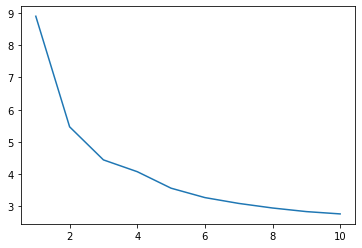

In [ ]:
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(file)
    mean.append(sum(np.min(cdist(file, model.cluster_centers_,"euclidean"),axis = 1))/file.shape[0])
plt.plot(clusters, mean)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(file[file_new])
adjusted_rand_score(file[target], kmeans.labels_)

0.024169010779343917

In [ ]:
stud = linkage(file[file_new], method = "centroid")
labels = fcluster(stud, 2, criterion = "maxclust")
adjusted_rand_score(file[target], labels)

0.011347166532750133

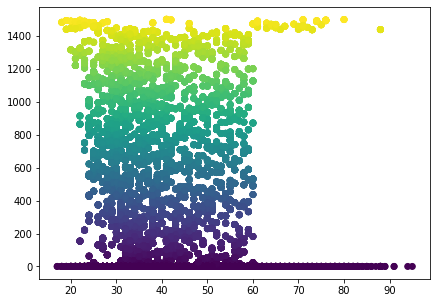

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(file[file_new])
file[target] = dbscan.labels_+1
plt.figure(figsize=(7,5))
plt.scatter(file.iloc[:,0], file.iloc[:,3], c=dbscan.labels_+1)
plt.show()

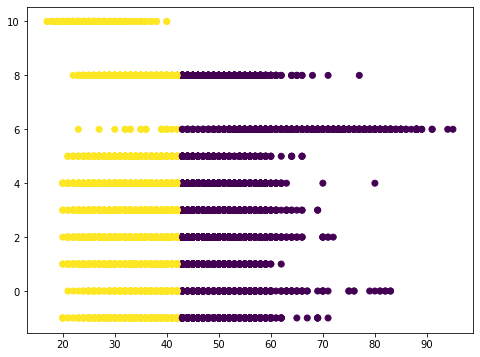

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(file.iloc[:,0],file.iloc[:,1], c=kmeans.labels_.astype(float))